In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import joblib

from tensorflow import keras
from tensorflow.keras import metrics
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from sklearn.preprocessing import LabelBinarizer
from tensorflow.python.keras import activations
from tensorflow.python.ops.gen_dataset_ops import OneShotIterator
from snapshot import SnapshotCallbackBuilder
from scipy.optimize import minimize
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder
from models import RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Input, LSTM, ConvLSTM2D, TimeDistributed, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K

from sklearn.metrics import accuracy_score

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
def get_snapshot_names(folder_name, model_prefix, j, m):
    model_names = os.listdir(f'weights/{folder_name}')
    model_names = [k for k in model_names if not 'Best' in k]
    return model_names[-min(len(model_names), m):]

def calculate_weighted_accuracy(predictions, y_test):
    predictions = np.array(predictions)
    prediction_weights = [1. / predictions.shape[0]] * predictions.shape[0]
    weighted_predictions = np.zeros((predictions.shape[1], 2), dtype='float32')
    for weight, prediction in zip(prediction_weights, predictions):
        weighted_predictions += weight * prediction
    yPred = enc.inverse_transform(weighted_predictions)
    yTrue = enc.inverse_transform(y_test)
    return accuracy_score(yTrue, yPred)

Training RNN-elec-10M-24T-400E...
(3172, 8) (3172, 2)
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 48)                10944     
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 98        
Total params: 11,042
Trainable params: 11,042
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 48)                10944     
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 98        
Total params: 11,042
Trainable params: 11,042
Non-trainable params: 0
__________________________________

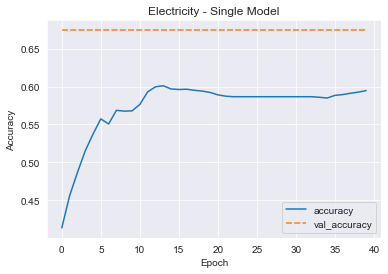

Epoch 1/40
1/1 [==============================] - 0s 254ms/step - loss: 0.6646 - acc: 0.6157
Epoch 2/40
1/1 [==============================] - 0s 255ms/step - loss: 0.6645 - acc: 0.6171
Epoch 3/40
1/1 [==============================] - 0s 257ms/step - loss: 0.6642 - acc: 0.6171
Epoch 4/40
1/1 [==============================] - 0s 295ms/step - loss: 0.6638 - acc: 0.6174
Epoch 5/40
1/1 [==============================] - 0s 249ms/step - loss: 0.6634 - acc: 0.6178
Epoch 6/40
1/1 [==============================] - 0s 251ms/step - loss: 0.6629 - acc: 0.6199
Epoch 7/40
1/1 [==============================] - 0s 246ms/step - loss: 0.6625 - acc: 0.6210
Epoch 8/40
1/1 [==============================] - 0s 249ms/step - loss: 0.6621 - acc: 0.6213
Epoch 9/40
1/1 [==============================] - 0s 238ms/step - loss: 0.6618 - acc: 0.6213
Epoch 10/40
1/1 [==============================] - 0s 244ms/step - loss: 0.6616 - acc: 0.6217
Epoch 11/40
1/1 [==============================] - 0s 247ms/step - lo

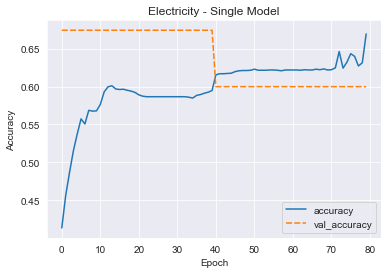

Epoch 1/40
1/1 [==============================] - 0s 219ms/step - loss: 0.6765 - acc: 0.5465
Epoch 2/40
1/1 [==============================] - 0s 222ms/step - loss: 0.6964 - acc: 0.5387
Epoch 3/40
1/1 [==============================] - 0s 224ms/step - loss: 0.6493 - acc: 0.6280
Epoch 4/40
1/1 [==============================] - 0s 240ms/step - loss: 0.6597 - acc: 0.5878
Epoch 5/40
1/1 [==============================] - 0s 211ms/step - loss: 0.6498 - acc: 0.6210
Epoch 6/40
1/1 [==============================] - 0s 225ms/step - loss: 0.6428 - acc: 0.6499
Epoch 7/40
1/1 [==============================] - 0s 217ms/step - loss: 0.6546 - acc: 0.6570
Epoch 8/40
1/1 [==============================] - 0s 248ms/step - loss: 0.6363 - acc: 0.6771
Epoch 9/40
1/1 [==============================] - 0s 232ms/step - loss: 0.6425 - acc: 0.6881
Epoch 10/40
1/1 [==============================] - 0s 223ms/step - loss: 0.6407 - acc: 0.6892
Epoch 11/40
1/1 [==============================] - 0s 239ms/step - lo

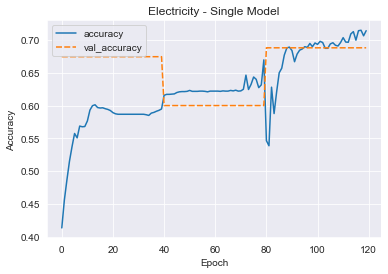

Epoch 1/40
1/1 [==============================] - 0s 252ms/step - loss: 0.9130 - acc: 0.6443
Epoch 2/40
1/1 [==============================] - 0s 234ms/step - loss: 0.7547 - acc: 0.5606
Epoch 3/40
1/1 [==============================] - 0s 243ms/step - loss: 0.7847 - acc: 0.5546
Epoch 4/40
1/1 [==============================] - 0s 255ms/step - loss: 0.7872 - acc: 0.5419
Epoch 5/40
1/1 [==============================] - 0s 242ms/step - loss: 0.7775 - acc: 0.5337
Epoch 6/40
1/1 [==============================] - 0s 246ms/step - loss: 0.7635 - acc: 0.5348
Epoch 7/40
1/1 [==============================] - 0s 251ms/step - loss: 0.7486 - acc: 0.5351
Epoch 8/40
1/1 [==============================] - 0s 254ms/step - loss: 0.7349 - acc: 0.5337
Epoch 9/40
1/1 [==============================] - 0s 263ms/step - loss: 0.7231 - acc: 0.5327
Epoch 10/40
1/1 [==============================] - 0s 245ms/step - loss: 0.7136 - acc: 0.5323
Epoch 11/40
1/1 [==============================] - 0s 231ms/step - lo

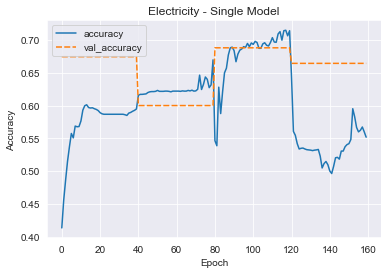

Epoch 1/40
1/1 [==============================] - 0s 235ms/step - loss: 0.6723 - acc: 0.5850
Epoch 2/40
1/1 [==============================] - 0s 260ms/step - loss: 0.6714 - acc: 0.5881
Epoch 3/40
1/1 [==============================] - 0s 229ms/step - loss: 0.6708 - acc: 0.5878
Epoch 4/40
1/1 [==============================] - 0s 230ms/step - loss: 0.6695 - acc: 0.5924
Epoch 5/40
1/1 [==============================] - 0s 258ms/step - loss: 0.6672 - acc: 0.6008
Epoch 6/40
1/1 [==============================] - 0s 234ms/step - loss: 0.6641 - acc: 0.6076
Epoch 7/40
1/1 [==============================] - 0s 264ms/step - loss: 0.6604 - acc: 0.6185
Epoch 8/40
1/1 [==============================] - 0s 231ms/step - loss: 0.6563 - acc: 0.6341
Epoch 9/40
1/1 [==============================] - 0s 234ms/step - loss: 0.6527 - acc: 0.6348
Epoch 10/40
1/1 [==============================] - 0s 246ms/step - loss: 0.6510 - acc: 0.6242
Epoch 11/40
1/1 [==============================] - 0s 249ms/step - lo

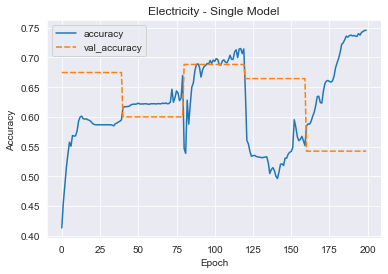

Epoch 1/40
1/1 [==============================] - 0s 233ms/step - loss: 0.6829 - acc: 0.6464
Epoch 2/40
1/1 [==============================] - 0s 237ms/step - loss: 0.6267 - acc: 0.6531
Epoch 3/40
1/1 [==============================] - 0s 245ms/step - loss: 0.6395 - acc: 0.6404
Epoch 4/40
1/1 [==============================] - 0s 244ms/step - loss: 0.6502 - acc: 0.6450
Epoch 5/40
1/1 [==============================] - 0s 243ms/step - loss: 0.6574 - acc: 0.6443
Epoch 6/40
1/1 [==============================] - 0s 251ms/step - loss: 0.6615 - acc: 0.6422
Epoch 7/40
1/1 [==============================] - 0s 249ms/step - loss: 0.6632 - acc: 0.6425
Epoch 8/40
1/1 [==============================] - 0s 256ms/step - loss: 0.6634 - acc: 0.6401
Epoch 9/40
1/1 [==============================] - 0s 253ms/step - loss: 0.6625 - acc: 0.6401
Epoch 10/40
1/1 [==============================] - 0s 242ms/step - loss: 0.6607 - acc: 0.6397
Epoch 11/40
1/1 [==============================] - 0s 249ms/step - lo

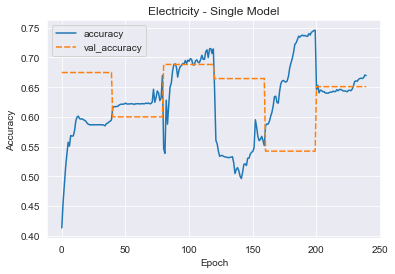

Epoch 1/40
1/1 [==============================] - 0s 227ms/step - loss: 0.6739 - acc: 0.5814
Epoch 2/40
1/1 [==============================] - 0s 243ms/step - loss: 0.6645 - acc: 0.5924
Epoch 3/40
1/1 [==============================] - 0s 264ms/step - loss: 0.6648 - acc: 0.6072
Epoch 4/40
1/1 [==============================] - 0s 273ms/step - loss: 0.6651 - acc: 0.6065
Epoch 5/40
1/1 [==============================] - 0s 243ms/step - loss: 0.6619 - acc: 0.6107
Epoch 6/40
1/1 [==============================] - 0s 241ms/step - loss: 0.6614 - acc: 0.6227
Epoch 7/40
1/1 [==============================] - 0s 238ms/step - loss: 0.6580 - acc: 0.6263
Epoch 8/40
1/1 [==============================] - 0s 246ms/step - loss: 0.6507 - acc: 0.6259
Epoch 9/40
1/1 [==============================] - 0s 237ms/step - loss: 0.6456 - acc: 0.6242
Epoch 10/40
1/1 [==============================] - 0s 262ms/step - loss: 0.6406 - acc: 0.6245
Epoch 11/40
1/1 [==============================] - 0s 238ms/step - lo

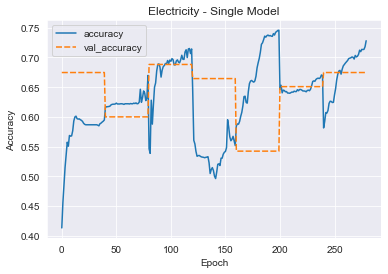

Epoch 1/40
1/1 [==============================] - 0s 253ms/step - loss: 0.6052 - acc: 0.6726
Epoch 2/40
1/1 [==============================] - 0s 286ms/step - loss: 0.5977 - acc: 0.6673
Epoch 3/40
1/1 [==============================] - 0s 271ms/step - loss: 0.5855 - acc: 0.6860
Epoch 4/40
1/1 [==============================] - 0s 268ms/step - loss: 0.5776 - acc: 0.6962
Epoch 5/40
1/1 [==============================] - 0s 261ms/step - loss: 0.5738 - acc: 0.7068
Epoch 6/40
1/1 [==============================] - 0s 239ms/step - loss: 0.5743 - acc: 0.7121
Epoch 7/40
1/1 [==============================] - 0s 241ms/step - loss: 0.5794 - acc: 0.7043
Epoch 8/40
1/1 [==============================] - 0s 229ms/step - loss: 0.5846 - acc: 0.7008
Epoch 9/40
1/1 [==============================] - 0s 232ms/step - loss: 0.5764 - acc: 0.7075
Epoch 10/40
1/1 [==============================] - 0s 244ms/step - loss: 0.5679 - acc: 0.7128
Epoch 11/40
1/1 [==============================] - 0s 242ms/step - lo

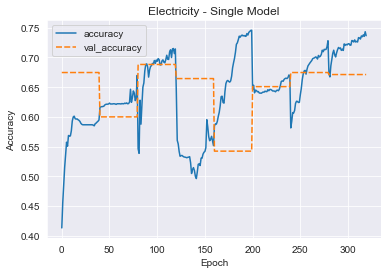

Epoch 1/40
1/1 [==============================] - 0s 230ms/step - loss: 0.9086 - acc: 0.6329
Epoch 2/40
1/1 [==============================] - 0s 222ms/step - loss: 1.8602 - acc: 0.6654
Epoch 3/40
1/1 [==============================] - 0s 236ms/step - loss: 0.8560 - acc: 0.7092
Epoch 4/40
1/1 [==============================] - 0s 232ms/step - loss: 0.7059 - acc: 0.7117
Epoch 5/40
1/1 [==============================] - 0s 236ms/step - loss: 0.6927 - acc: 0.6544
Epoch 6/40
1/1 [==============================] - 0s 231ms/step - loss: 0.6986 - acc: 0.6152
Epoch 7/40
1/1 [==============================] - 0s 238ms/step - loss: 0.6981 - acc: 0.5993
Epoch 8/40
1/1 [==============================] - 0s 267ms/step - loss: 0.6926 - acc: 0.5951
Epoch 9/40
1/1 [==============================] - 0s 237ms/step - loss: 0.6863 - acc: 0.5940
Epoch 10/40
1/1 [==============================] - 0s 239ms/step - loss: 0.6815 - acc: 0.5943
Epoch 11/40
1/1 [==============================] - 0s 231ms/step - lo

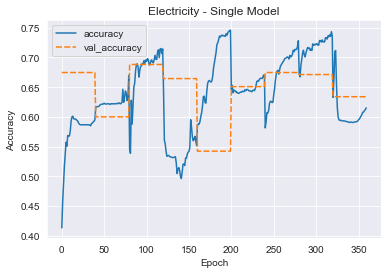

Epoch 1/40
1/1 [==============================] - 0s 253ms/step - loss: 0.6552 - acc: 0.6170
Epoch 2/40
1/1 [==============================] - 0s 250ms/step - loss: 0.6543 - acc: 0.6184
Epoch 3/40
1/1 [==============================] - 0s 274ms/step - loss: 0.6534 - acc: 0.6191
Epoch 4/40
1/1 [==============================] - 0s 232ms/step - loss: 0.6523 - acc: 0.6201
Epoch 5/40
1/1 [==============================] - 0s 228ms/step - loss: 0.6511 - acc: 0.6205
Epoch 6/40
1/1 [==============================] - 0s 258ms/step - loss: 0.6497 - acc: 0.6212
Epoch 7/40
1/1 [==============================] - 0s 235ms/step - loss: 0.6480 - acc: 0.6201
Epoch 8/40
1/1 [==============================] - 0s 222ms/step - loss: 0.6462 - acc: 0.6223
Epoch 9/40
1/1 [==============================] - 0s 248ms/step - loss: 0.6441 - acc: 0.6251
Epoch 10/40
1/1 [==============================] - 0s 238ms/step - loss: 0.6416 - acc: 0.6304
Epoch 11/40
1/1 [==============================] - 0s 237ms/step - lo

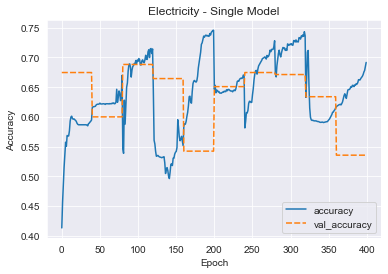

Saving model in weights/RNN-elec-10M-24T-400E/RNN-elec-10M-24T-400E.h5


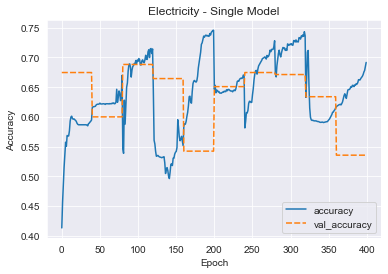

In [22]:
n_epochs = 400
n_models = 10
n_steps = 24
train_snapshot = True
model_prefix = f"RNN-elec-{'snapshot-' if train_snapshot else ''}{n_models}M-{n_steps}T-{n_epochs}E"
model_folder = f'{model_prefix}'

if not os.path.exists(f'weights/{model_folder}'):
    os.makedirs(f'weights/{model_folder}')

print(f'Training {model_prefix}...')

sns.set_style("darkgrid")

elec = pd.read_csv('../data/electricity-normalized.csv')
X = elec.values[:,0:8].astype(np.float)
y = elec.values[:,8]

enc = OneHotEncoder(categories=[['DOWN', 'UP']])
y = enc.fit_transform(y.reshape(-1, 1)).toarray()

snapshot = SnapshotCallbackBuilder(nb_epochs=n_epochs, nb_snapshots=n_models, init_lr=0.01)

split_idx = int(len(X) * 0.7)
chunks_X = np.array(np.array_split(X[:split_idx], n_models))
chunks_y = np.array(np.array_split(y[:split_idx], n_models))

print(chunks_X[0].shape, chunks_y[0].shape)

model = RNN.create_rnn_model(n_timesteps=n_steps, n_features=8, n_outputs=2)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model_predictor = RNN.create_rnn_model(n_timesteps=n_steps, n_features=8, n_outputs=2)
model_predictor.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

accuracies = []
train_acc = []
val_acc = []

for train_X, train_y, i in zip(chunks_X, chunks_y, range(n_models)):
    dataset = timeseries_dataset_from_array(train_X, train_y, sequence_length=n_steps, batch_size=len(train_X), end_index=int(0.9 * len(train_X)))
    dataset_test = timeseries_dataset_from_array(train_X, train_y, sequence_length=n_steps, batch_size=len(train_X), start_index=int(0.9 * len(train_X)))

    if train_snapshot:

        hist = model.fit(
            dataset, 
            epochs=int(n_epochs // n_models),
            callbacks=snapshot.get_callbacks(
                model_prefix=f'{model_folder}/{model_prefix}-{i}'
            ),  # Build snapshot callbacks
            # validation_data=dataset_test
        )

        predictions = []
        for fn in get_snapshot_names(model_folder, model_prefix, i, 5):
            model_predictor.load_weights(f'weights/{model_folder}/{fn}')
            prediction = model_predictor.predict(dataset_test, batch_size=100)
            predictions.append(prediction)

        train_acc.extend(hist.history['acc'])
        validation_acc = calculate_weighted_accuracy(predictions, list(dataset_test)[0][1])
        val_acc.extend([validation_acc] * (n_epochs // n_models))

    else: # no snapshot

        hist = model.fit(
            dataset, 
            epochs=int(n_epochs // n_models),
            # validation_data=dataset_test
        )

        train_acc.extend(hist.history['acc'])
        yPred = enc.inverse_transform(model.predict(dataset_test))
        yTrue = enc.inverse_transform(list(dataset_test)[0][1])
        validation_accuracy = accuracy_score(yTrue, yPred)
        val_acc.extend([validation_accuracy] * (n_epochs // n_models))
        print(val_acc)

        df = pd.DataFrame({ 'accuracy': train_acc, 'val_accuracy': val_acc })
        fig = sns.lineplot(data=df)
        fig.set_title(f"Electricity - {'Snapshot' if train_snapshot else 'Single Model'}")
        fig.set_xlabel('Epoch')
        fig.set_ylabel('Accuracy')
        plt.show()

if not train_snapshot:
    print(f'Saving model in weights/{model_folder}/{model_prefix}.h5')
    model.save_weights(f'weights/{model_folder}/{model_prefix}.h5')

df = pd.DataFrame({ 'accuracy': train_acc, 'val_accuracy': val_acc })
fig = sns.lineplot(data=df)
fig.set_title(f"Electricity - {'Snapshot' if train_snapshot else 'Single Model'}")
fig.set_xlabel('Epoch')
fig.set_ylabel('Accuracy')
plt.savefig(f'weights/{model_folder}/{model_prefix}.pdf')

with open(f'weights/{model_folder}/{model_prefix}.csv', mode='w') as f:
    df.to_csv(f)

In [ ]:
dataset_test = timeseries_dataset_from_array(X, y, sequence_length=n_steps, batch_size=300, start_index=int(0.7 * len(X)))
ss_accuracy = snapshot_model.evaluate(dataset_test)[1]
print(f'Accuracy: {ss_accuracy}')